In [1]:
import pandas as pd

## 예제 10-15 최신 인기 음악 데이터

In [2]:
import matplotlib.pyplot as plt

In [3]:
music = pd.read_csv('../data/musicData.csv', encoding='utf-8')

In [4]:
music.shape

(996, 7)

In [5]:
music.dtypes

Album Title      object
Artist Name      object
Genre            object
Date             object
Distribution     object
Rating          float64
Music Count       int64
dtype: object

In [6]:
music.head()

,Album Title,Artist Name,Genre,Date,Distribution,Rating,Music Count
0,거기가 어딘데?? OST,Various Artists,O.S.T,2018.09.01,워너뮤직코리아,6.4,8
1,얍,갈릭스(Garlixx),"인디뮤직, 락",2018.09.01,(주)미러볼뮤직,3.8,2
2,너와 나,파란,발라드,2018.09.01,(주)지니뮤직,7.7,2
3,PRODUCE 48 - FINAL,PRODUCE 48,댄스,2018.09.01,Stone Music Entertainment,7.0,4
4,Weather : 오늘 당신의 날씨는 어떤가요? Part 4,이진아,재즈,2018.09.01,(주)지니뮤직,6.7,1


In [7]:
music['Date'] = music['Date'].astype('datetime64')

In [8]:
music.Date.dtype

dtype('<M8[ns]')

In [9]:
music.Distribution.value_counts().head()

Stone Music Entertainment    102
로엔엔터테인먼트                      95
(주)지니뮤직                       80
워너뮤직코리아                       58
(주)오감엔터테인먼트                   52
Name: Distribution, dtype: int64

In [10]:
music_star = (music.groupby('Distribution')
                 .agg({'Rating' : 'sum', 
                      'Distribution' : 'count'})
              .sort_values(by='Rating',ascending=False))

In [11]:
%matplotlib inline

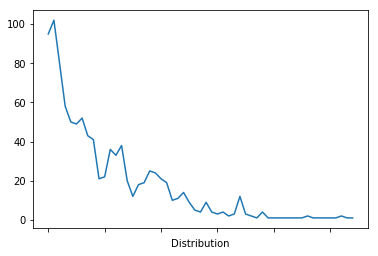

In [12]:
music_star['Distribution'].plot()

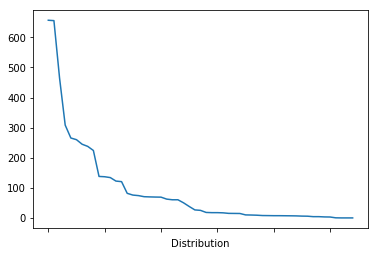

In [13]:
music_star['Rating'].plot()

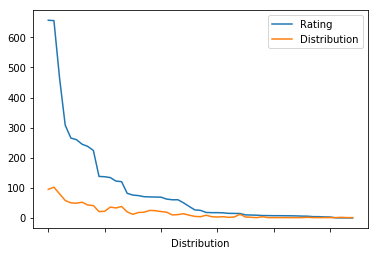

In [14]:
music_star.plot()

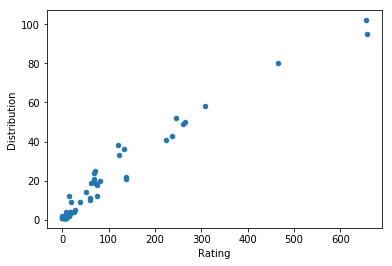

In [15]:
music_star.plot.scatter('Rating', 'Distribution')

## 예제 10-16  연도별 음악 데이터

In [16]:
music2 = pd.read_csv('../data/musicData2.csv', encoding='utf-8')

In [17]:
music2.head()

,Year,Month,Album Title,Artist Name,Genre,Date,Distribution,Rating,Music Count
0,2017,1,Boys and Girls Music Vol. 1,샘김,알앤비/어반,2017.01.25,로엔 엔터테인먼트,8.6,2
1,2017,1,여자친구 The 1st Album 'LOL',여자친구(GFRIEND),댄스,2016.07.11,로엔엔터테인먼트,8.1,12
2,2017,1,Collage (EP),The Chainsmokers,일렉트로니카,2016.11.05,소니뮤직,7.5,5
3,2017,1,If You,에일리,발라드,2016.08.23,로엔 엔터테인먼트,6.9,1
4,2017,1,세 단어,젝스키스,발라드,2016.10.07,YG PLUS,9.0,1


In [18]:
music2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2178 entries, 0 to 2177
Data columns (total 9 columns):
Year            2178 non-null int64
Month           2178 non-null int64
Album Title     2178 non-null object
Artist Name     2178 non-null object
Genre           2177 non-null object
Date            2178 non-null object
Distribution    2178 non-null object
Rating          2178 non-null float64
Music Count     2178 non-null int64
dtypes: float64(1), int64(3), object(5)
memory usage: 153.2+ KB


In [19]:
music2.select_dtypes(include=['number']).head()

,Year,Month,Rating,Music Count
0,2017,1,8.6,2
1,2017,1,8.1,12
2,2017,1,7.5,5
3,2017,1,6.9,1
4,2017,1,9.0,1


In [66]:
music2.Genre.value_counts().head()

댄스        548
발라드       409
랩/힙합      300
알앤비/어반    172
드라마음악     141
Name: Genre, dtype: int64

In [22]:
pd.set_option('chained',None)

In [23]:
music2[music2['Genre'].isnull()]

,Year,Month,Album Title,Artist Name,Genre,Date,Distribution,Rating,Music Count
1104,2017,12,All I Want For Christmas (EP),Mariah Carey,NaN,2007.11.26,Sony Music,8.9,3


In [24]:
music2.loc[1104, 'Genre'] = '팝'

In [25]:
music2.isnull().sum()

Year            0
Month           0
Album Title     0
Artist Name     0
Genre           0
Date            0
Distribution    0
Rating          0
Music Count     0
dtype: int64

In [26]:
music2.loc[1104]

Year                                     2017
Month                                      12
Album Title     All I Want For Christmas (EP)
Artist Name                      Mariah Carey
Genre                                       팝
Date                               2007.11.26
Distribution                       Sony Music
Rating                                    8.9
Music Count                                 3
Name: 1104, dtype: object

In [27]:
music2["YearMonth"] = music2.Year.astype('str') + "/" + music2.Month.astype('str')

In [28]:
music2["YearMonth"].head()

0    2017/1
1    2017/1
2    2017/1
3    2017/1
4    2017/1
Name: YearMonth, dtype: object

In [29]:
music2["YearMonth"].tail()

2173    2018/10
2174    2018/10
2175    2018/10
2176    2018/10
2177    2018/10
Name: YearMonth, dtype: object

In [30]:
music2["YearMonth"].isnull().sum()

0

In [31]:
pd.to_datetime(music2["YearMonth"], format='%Y/%m').head()

0   2017-01-01
1   2017-01-01
2   2017-01-01
3   2017-01-01
4   2017-01-01
Name: YearMonth, dtype: datetime64[ns]

In [32]:
music3 = music2.copy()

In [33]:
music3["YearMonth"] = pd.to_datetime(music2["YearMonth"], format='%Y/%m')

In [34]:
music3["YearMonth"].dtype

dtype('<M8[ns]')

In [35]:
music3.head()

,Year,Month,Album Title,Artist Name,Genre,Date,Distribution,Rating,Music Count,YearMonth
0,2017,1,Boys and Girls Music Vol. 1,샘김,알앤비/어반,2017.01.25,로엔 엔터테인먼트,8.6,2,2017-01-01
1,2017,1,여자친구 The 1st Album 'LOL',여자친구(GFRIEND),댄스,2016.07.11,로엔엔터테인먼트,8.1,12,2017-01-01
2,2017,1,Collage (EP),The Chainsmokers,일렉트로니카,2016.11.05,소니뮤직,7.5,5,2017-01-01
3,2017,1,If You,에일리,발라드,2016.08.23,로엔 엔터테인먼트,6.9,1,2017-01-01
4,2017,1,세 단어,젝스키스,발라드,2016.10.07,YG PLUS,9.0,1,2017-01-01


In [36]:
music_2017 = music3[music3['Year'] == 2017 ].copy()

In [37]:
music_2018 = music3[music3['Year'] == 2018 ].copy()

In [38]:
music_2017 = music_2017.drop(['Year','Month'],axis=1).set_index("YearMonth")

In [39]:
music_2017.head()

,Album Title,Artist Name,Genre,Date,Distribution,Rating,Music Count
YearMonth,,,,,,,
2017-01-01,Boys and Girls Music Vol. 1,샘김,알앤비/어반,2017.01.25,로엔 엔터테인먼트,8.6,2
2017-01-01,여자친구 The 1st Album 'LOL',여자친구(GFRIEND),댄스,2016.07.11,로엔엔터테인먼트,8.1,12
2017-01-01,Collage (EP),The Chainsmokers,일렉트로니카,2016.11.05,소니뮤직,7.5,5
2017-01-01,If You,에일리,발라드,2016.08.23,로엔 엔터테인먼트,6.9,1
2017-01-01,세 단어,젝스키스,발라드,2016.10.07,YG PLUS,9.0,1


In [40]:
music_2018 = music_2018.drop(['Year','Month'],axis=1).set_index("YearMonth")

In [41]:
music_2018.head()

,Album Title,Artist Name,Genre,Date,Distribution,Rating,Music Count
YearMonth,,,,,,,
2018-01-01,Red Pill Blues (Deluxe Edition),Maroon 5,"팝, 얼터너티브 락",2017.11.03,유니버설뮤직,6.9,21
2018-01-01,Be Ordinary,황치열,발라드,2017.06.13,(주)엔에이치엔벅스,8.5,7
2018-01-01,"Universe - 겨울 스페셜 앨범, 2017",EXO,발라드,2017.12.26,(주)아이리버,8.6,8
2018-01-01,5집 ANOTHER LIGHT,젝스키스,발라드,2017.09.21,(주)지니뮤직,8.5,9
2018-01-01,세 단어,젝스키스,발라드,2016.10.07,YG PLUS,9.0,1


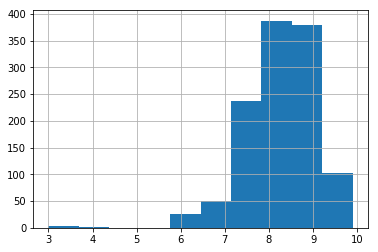

In [43]:
music_2017['Rating'].hist()

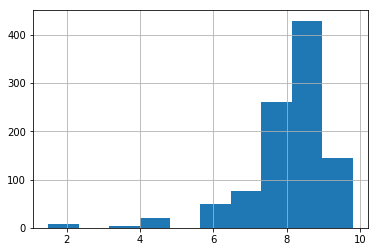

In [44]:
music_2018['Rating'].hist()

In [70]:
import sys

if sys.platform == 'win32' :
    from matplotlib import font_manager, rc
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

In [74]:
music_2017['Music Count'].value_counts().head()

2     181
6     169
1     137
11    135
5     100
Name: Music Count, dtype: int64

In [75]:
music_2017.groupby('Music Count').agg({'Rating':'mean'}).head()

,Rating
Music Count,
1,8.087591
2,8.039227
3,8.116667
4,7.430769
5,8.157000


Text(0.04,0.5,'common Y')

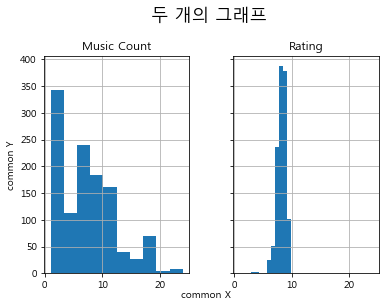

In [68]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True)

music_2017[['Music Count','Rating']].hist(ax=axes)


# set title and axis labels
plt.suptitle(' 두 개의 그래프', x=0.5, y=1.05, ha='center', fontsize='xx-large')
fig.text(0.5, 0.04, 'common X', ha='center')
fig.text(0.04, 0.5, 'common Y', va='center', rotation='vertical')

In [76]:
music_2018['Music Count'].value_counts().head()

5    137
6    133
7    129
2    106
1     99
Name: Music Count, dtype: int64

In [77]:
music_2018.groupby('Music Count').agg({'Rating':'mean'}).head()

,Rating
Music Count,
1,8.007071
2,7.694340
3,8.166667
4,7.010000
5,7.735036


Text(0.04,0.5,'common Y')

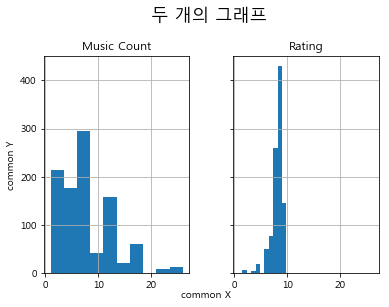

In [69]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True)


music_2018[['Music Count','Rating']].hist(ax=axes)

# set title and axis labels
plt.suptitle(' 두 개의 그래프', x=0.5, y=1.05, ha='center', fontsize='xx-large')
fig.text(0.5, 0.04, 'common X', ha='center')
fig.text(0.04, 0.5, 'common Y', va='center', rotation='vertical')

In [47]:
music_2017 = music_2017.reset_index()

In [48]:
x = music_2017.groupby(['YearMonth','Date']).agg({'Rating' : 'mean'}).sort_values(by='YearMonth')

In [49]:
x.head()

Rating
YearMonth  Date              
2017-01-01 2014.05.27     9.3
           2016.11.24     8.4
           2016.11.25     8.2
           2016.11.28     8.0
           2016.11.29     8.7

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BF92B70>]],
      dtype=object)

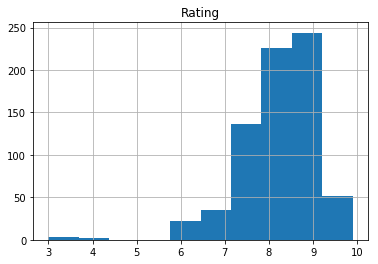

In [50]:
x.hist()

In [51]:
y = music_2017.groupby(['Genre']).agg({'Rating' : ['count','mean']}).sort_values(by=('Rating','mean'))

In [82]:
y.sort_values(by=('Rating','mean')).head()

Rating     
                            count mean
Genre                                 
인디뮤직,  포크                       1  4.0
팝,  얼터너티브 락                     4  6.9
발라드,  댄스,  알앤비/어반,  일렉트로니카      1  7.0
발라드,  재즈                        1  7.3
팝,  캐롤                          1  7.5

In [85]:
y[y[('Rating','count')] >= 200]

Rating         
       count     mean
Genre                
댄스       308  8.27013
발라드      231  8.42684

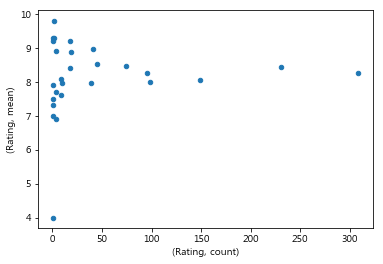

In [84]:
y.plot.scatter(('Rating','count'), ('Rating','mean'))

In [57]:
z = music_2018.groupby(['Genre']).agg({'Rating' : ['count','mean']}).sort_values(by=('Rating','mean'))

In [59]:
z.head()

Rating          
               count      mean
Genre                         
일렉트로니카,  인디뮤직      4  3.700000
인디뮤직,  포크          6  4.450000
팝,  얼터너티브 락        9  6.900000
발라드,  재즈           3  7.300000
댄스               240  7.697917

In [86]:
z[z[('Rating','count')] >= 200]

Rating          
       count      mean
Genre                 
댄스       240  7.697917

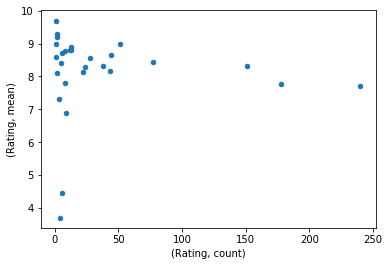

In [61]:
z.plot.scatter(('Rating','count'), ('Rating','mean'))

In [62]:
import sys

In [63]:
if sys.platform == 'win32' :
    from matplotlib import font_manager, rc
    import matplotlib.pyplot as plt
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
    plt.rcParams['axes.unicode_minus'] = False

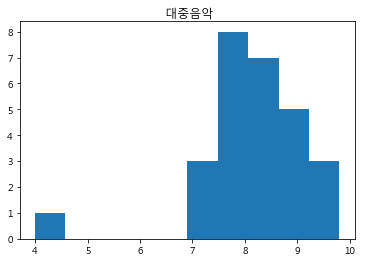

In [64]:
plt.hist(y[('Rating','mean')])
plt.title(" 대중음악")
plt.show()

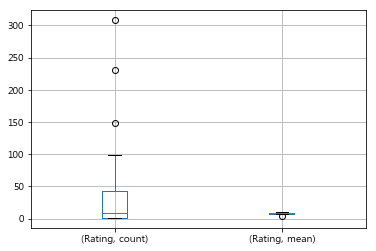

In [65]:
y.boxplot(column=[('Rating','count'), ('Rating','mean')])